<a href="https://colab.research.google.com/github/amitverma7426/DataScience/blob/main/Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Prediction Using Logistic Regression**


**Step 1: Importing Necessary Libraries**


In [51]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns


**Step 2: Data Preparation**


In [52]:
# Loading the dataset
df= pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [61]:
df.drop(['education'], axis=1, inplace=True, errors='ignore')


In [65]:
# change male column name with Sex_male
df.rename(columns = {'male': 'Sex_male'}, inplace = True)


In [66]:
# remove rows whose has missing value
df.dropna(axis = 0, inplace = True)

In [68]:
# Check missing values remove or not
df.isnull().sum()

,0
Sex_male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


In [69]:
print(df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


**Step 3: Splitting the Dataset into Test and Train Sets**


In [79]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
# Define X (features) and y (target)
X = df.drop(columns=['TenYearCHD','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diaBP','BMI',	'heartRate','Sex_male']) # Drop target column from features
y = df['TenYearCHD'] # Target column


# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train = scaler.fit_transform(X_train)

# Transform test data (use same scaler)
X_test = scaler.transform(X_test)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


**Step 4: Exploratory Data Analysis of Heart Disease Dataset**


<ipython-input-82-045870da0c44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=df,


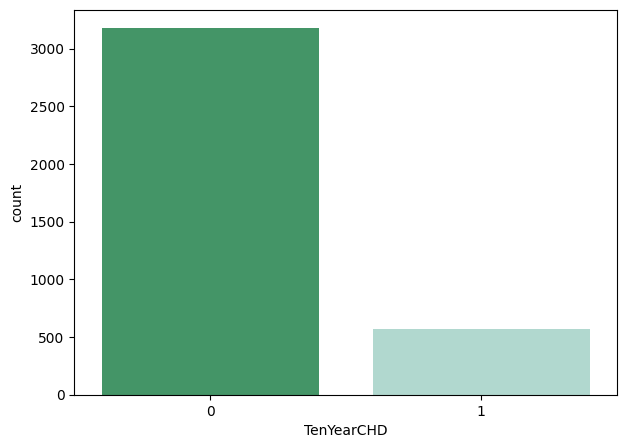

In [82]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=df,
             palette="BuGn_r")
plt.show()

The count plot shows a high imbalance in the dataset where the majority of individuals (over 3000) do not have heart disease (label 0) while only a small number (around 500) have heart disease (label 1).

**Counting number of patients affected by CHD where (0= Not Affected; 1= Affected)**



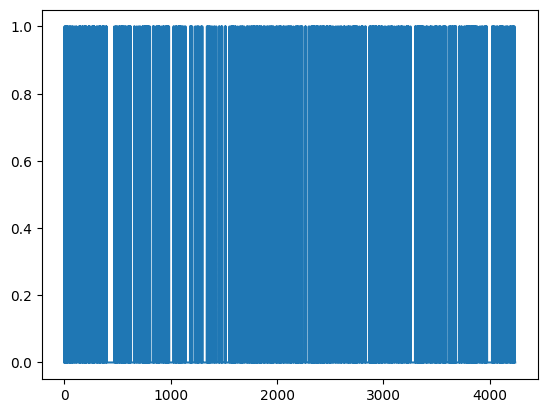

In [87]:
laste = df['TenYearCHD'].plot()
plt.show(laste)





*  Blue bars: Indicate the absence of heart disease.
*White space (gaps): These represent the presence of heart disease.



**Step 5: Fitting Logistic Regression Model for Heart Disease Prediction**


In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=500)      #  Model initialize karna
logreg.fit(X_train, y_train)       #  Model training
y_pred = logreg.predict(X_test)    #  Prediction karna

**Step 6: Evaluating Logistic Regression Model**



In [91]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))


Accuracy of the model is = 0.8516873889875666


In [92]:
print('The details for confusion matrix is =')
print(classification_report(y_test, y_pred))


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       951
           1       0.68      0.09      0.15       175

    accuracy                           0.85      1126
   macro avg       0.77      0.54      0.54      1126
weighted avg       0.83      0.85      0.80      1126



In [94]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[944,   7],
       [160,  15]])

In [96]:
# Convert into datafarme
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
conf_matrix


,Predicted:0,Predicted:1
Actual:0,944,7
Actual:1,160,15


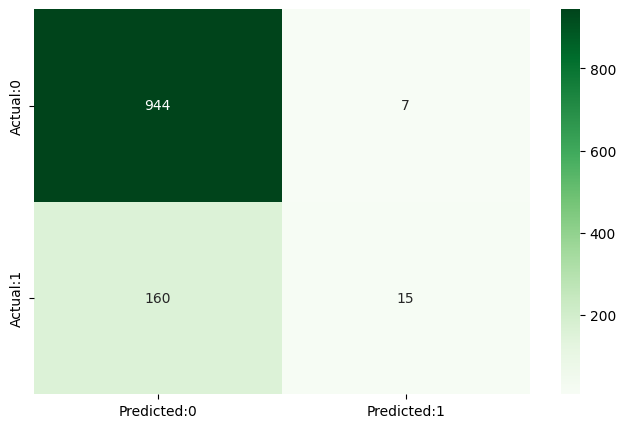

In [97]:
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()


The model performs well at predicting no heart disease (class 0) but poorly predicts heart disease (class 1) resulting in an imbalanced classification performance.